# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [17]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [38]:
# Import the Weather Data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# No NaN Data
#df.isnull().sum()

# Create new column only containing the month and the date for every observation
df['month-day'] = df['Date'].apply(lambda x: str(x)[5:11])
# Delete February 29th of the dataset
df = df[df['month-day'] != '02-29']

# Create new column only containing the year for every observation
df['year'] = df['Date'].apply(lambda x: str(x)[:4])

# Select data from years 2005 to 2014
df_2005_2014 = df[df['year'] != '2015']

# Select data from year 2015
df_2015 = df[df['year'] == '2015']

In [109]:
# Groupby the Date column and extract the Max() and the Min() values for all the dataframes

# Historical Min() data 2005 - 2014
history_min_2005_2014 = df_2005_2014.groupby(by='month-day')['Data_Value'].min()
# Historical Max() data 2005 - 2014
history_max_2005_2014 = df_2005_2014.groupby(by='month-day')['Data_Value'].max()

# Historical Min() data 2015
history_min_2015 = df_2015.groupby(by='month-day')['Data_Value'].min()
# Historical Max() data 2015
history_max_2015 = df_2015.groupby(by='month-day')['Data_Value'].max()

# Reset all the index to match the day of the year from (0 to 364)
history_max_2015 = history_max_2015.reset_index(level=0, drop=False)
history_min_2015 = history_min_2015.reset_index(level=0, drop=False)
#-----
history_max_2005_2014 = history_max_2005_2014.reset_index(level=0, drop=False)
history_min_2005_2014 = history_min_2005_2014.reset_index(level=0, drop=False)

history_max_2005_2014.head()

,month-day,Data_Value
0,01-01,156
1,01-02,139
2,01-03,133
3,01-04,106
4,01-05,128


In [110]:
# Experiment to check the order of the index for history_min 2015 VS 2005-2014

for index, (element1, element2) in enumerate(list(zip(history_min_2005_2014.index, history_min_2015.index))):
    if not element1 == element2:
        print(f"Element with index {index} is not True with the condition")
print("History Min-Min: Excellent! everything is OK")

print('-'*60)

for index, (element1, element2) in enumerate(list(zip(history_max_2005_2014.index, history_max_2015.index))):
    if not element1 == element2:
        print(f"Element with index {index} is not True with the condition")
print("History Max-Max: Excellent! everything is OK")

print('-'*60)

for index, (element1, element2) in enumerate(list(zip(history_max_2005_2014.index, history_min_2015.index))):
    if not element1 == element2:
        print(f"Element with index {index} is not True with the condition")
print("History Max-Min: Excellent! everything is OK")

print('-'*60)

for index, (element1, element2) in enumerate(list(zip(history_min_2005_2014.index, history_max_2015.index))):
    if not element1 == element2:
        print(f"Element with index {index} is not True with the condition")     
print("History Min-Max: Excellent! everything is OK")


History Min-Min: Excellent! everything is OK
------------------------------------------------------------
History Max-Max: Excellent! everything is OK
------------------------------------------------------------
History Max-Min: Excellent! everything is OK
------------------------------------------------------------
History Min-Max: Excellent! everything is OK


In [123]:
# Check if the data in the High 2015 as any value higher than the Historical High 2005-2014 temperatures.
days_higher = list(history_max_2015[history_max_2015 >= history_max_2005_2014]['Data_Value'].dropna().index)

# Check if the data in the Min 2015 as any value lower than the Historical Min 2005-2014 temperatures.
days_lower = list(history_min_2015[history_min_2015 <= history_min_2005_2014]['Data_Value'].dropna().index)

<IPython.core.display.Javascript object>


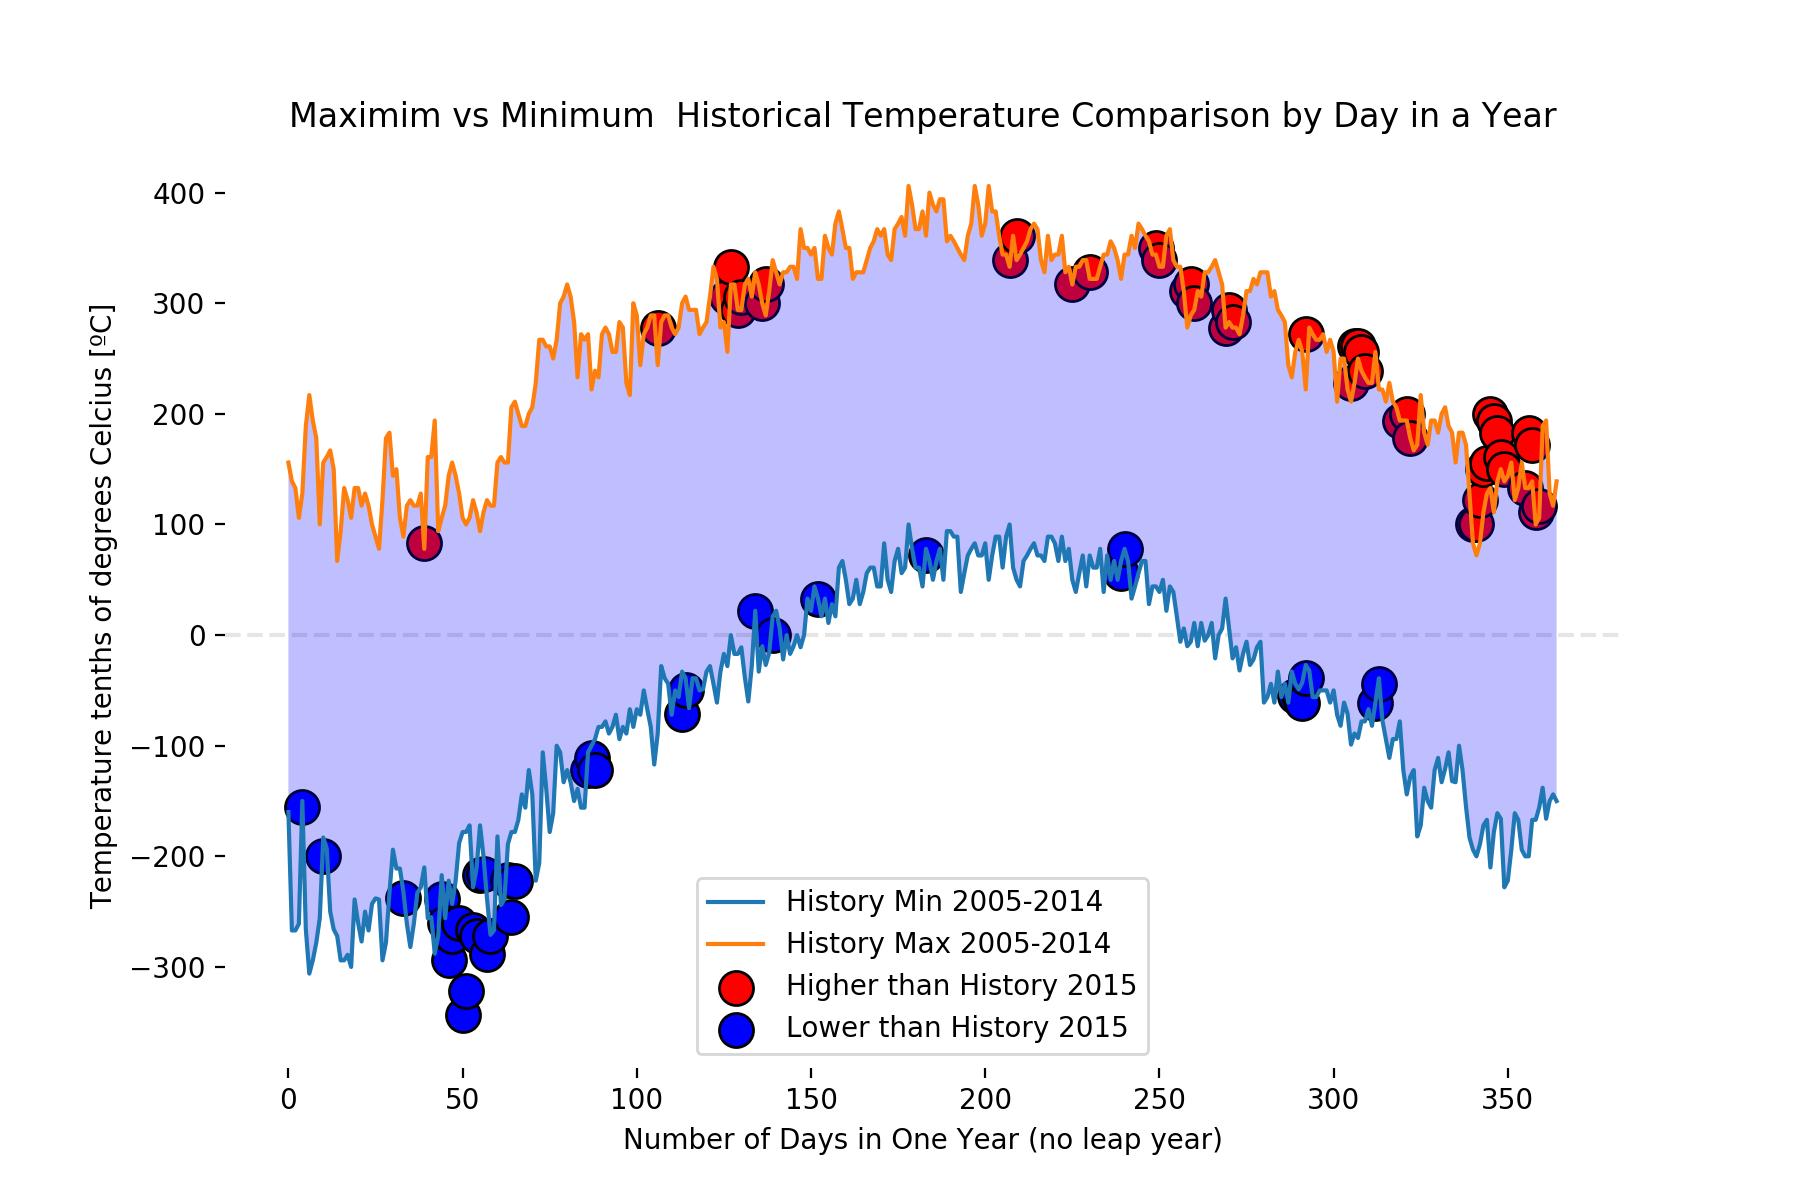

In [176]:
%matplotlib notebook
# Plotting

record_high = history_max_2015[history_max_2015 >= history_max_2005_2014]['Data_Value'].dropna()
record_low = history_min_2015[history_min_2015 <= history_min_2005_2014]['Data_Value'].dropna()

days_in_year = [day for day in range(0, 365)]

plt.figure(figsize=(9, 6))
ax = plt.gca()

ax.set_xlabel('Number of Days in One Year (no leap year)')
ax.set_ylabel('Temperature tenths of degrees Celcius [ºC]')
ax.set_title('Maximim vs Minimum  Historical Temperature Comparison by Day in a Year')

ax.axhline(y=0, color='black', linestyle='--', alpha=0.1)

ax.plot(days_in_year, history_min_2005_2014['Data_Value'], '-', label="History Min 2005-2014")
ax.plot(days_in_year, history_max_2005_2014['Data_Value'], '-', label="History Max 2005-2014")

ax.scatter(days_higher, record_high, label='Higher than History 2015', color="r", s=150, edgecolors='black')
ax.scatter(days_lower, record_low, label='Lower than History 2015', color="b", s=150, edgecolors='black')
ax.legend(loc=8)

ax.fill_between(days_in_year, history_min_2005_2014['Data_Value'], history_max_2005_2014['Data_Value'], facecolor='blue', alpha=0.25)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

    
plt.savefig('assingment2_climate_plot.png')
plt.show()

In [ ]:
! cp -av data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv .